In [2]:
#imports necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/churndata/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.isnull().any().any()

False

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

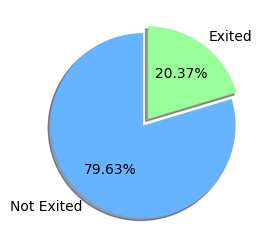

In [10]:
values = df['Exited'].value_counts()
labels = ['Not Exited', 'Exited']
colors = ['#66b3ff', '#99ff99']

fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
ax.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, explode=(0, 0.09), colors=colors, shadow=True)
plt.show()

20% of the customers have churned and 80% haven't.

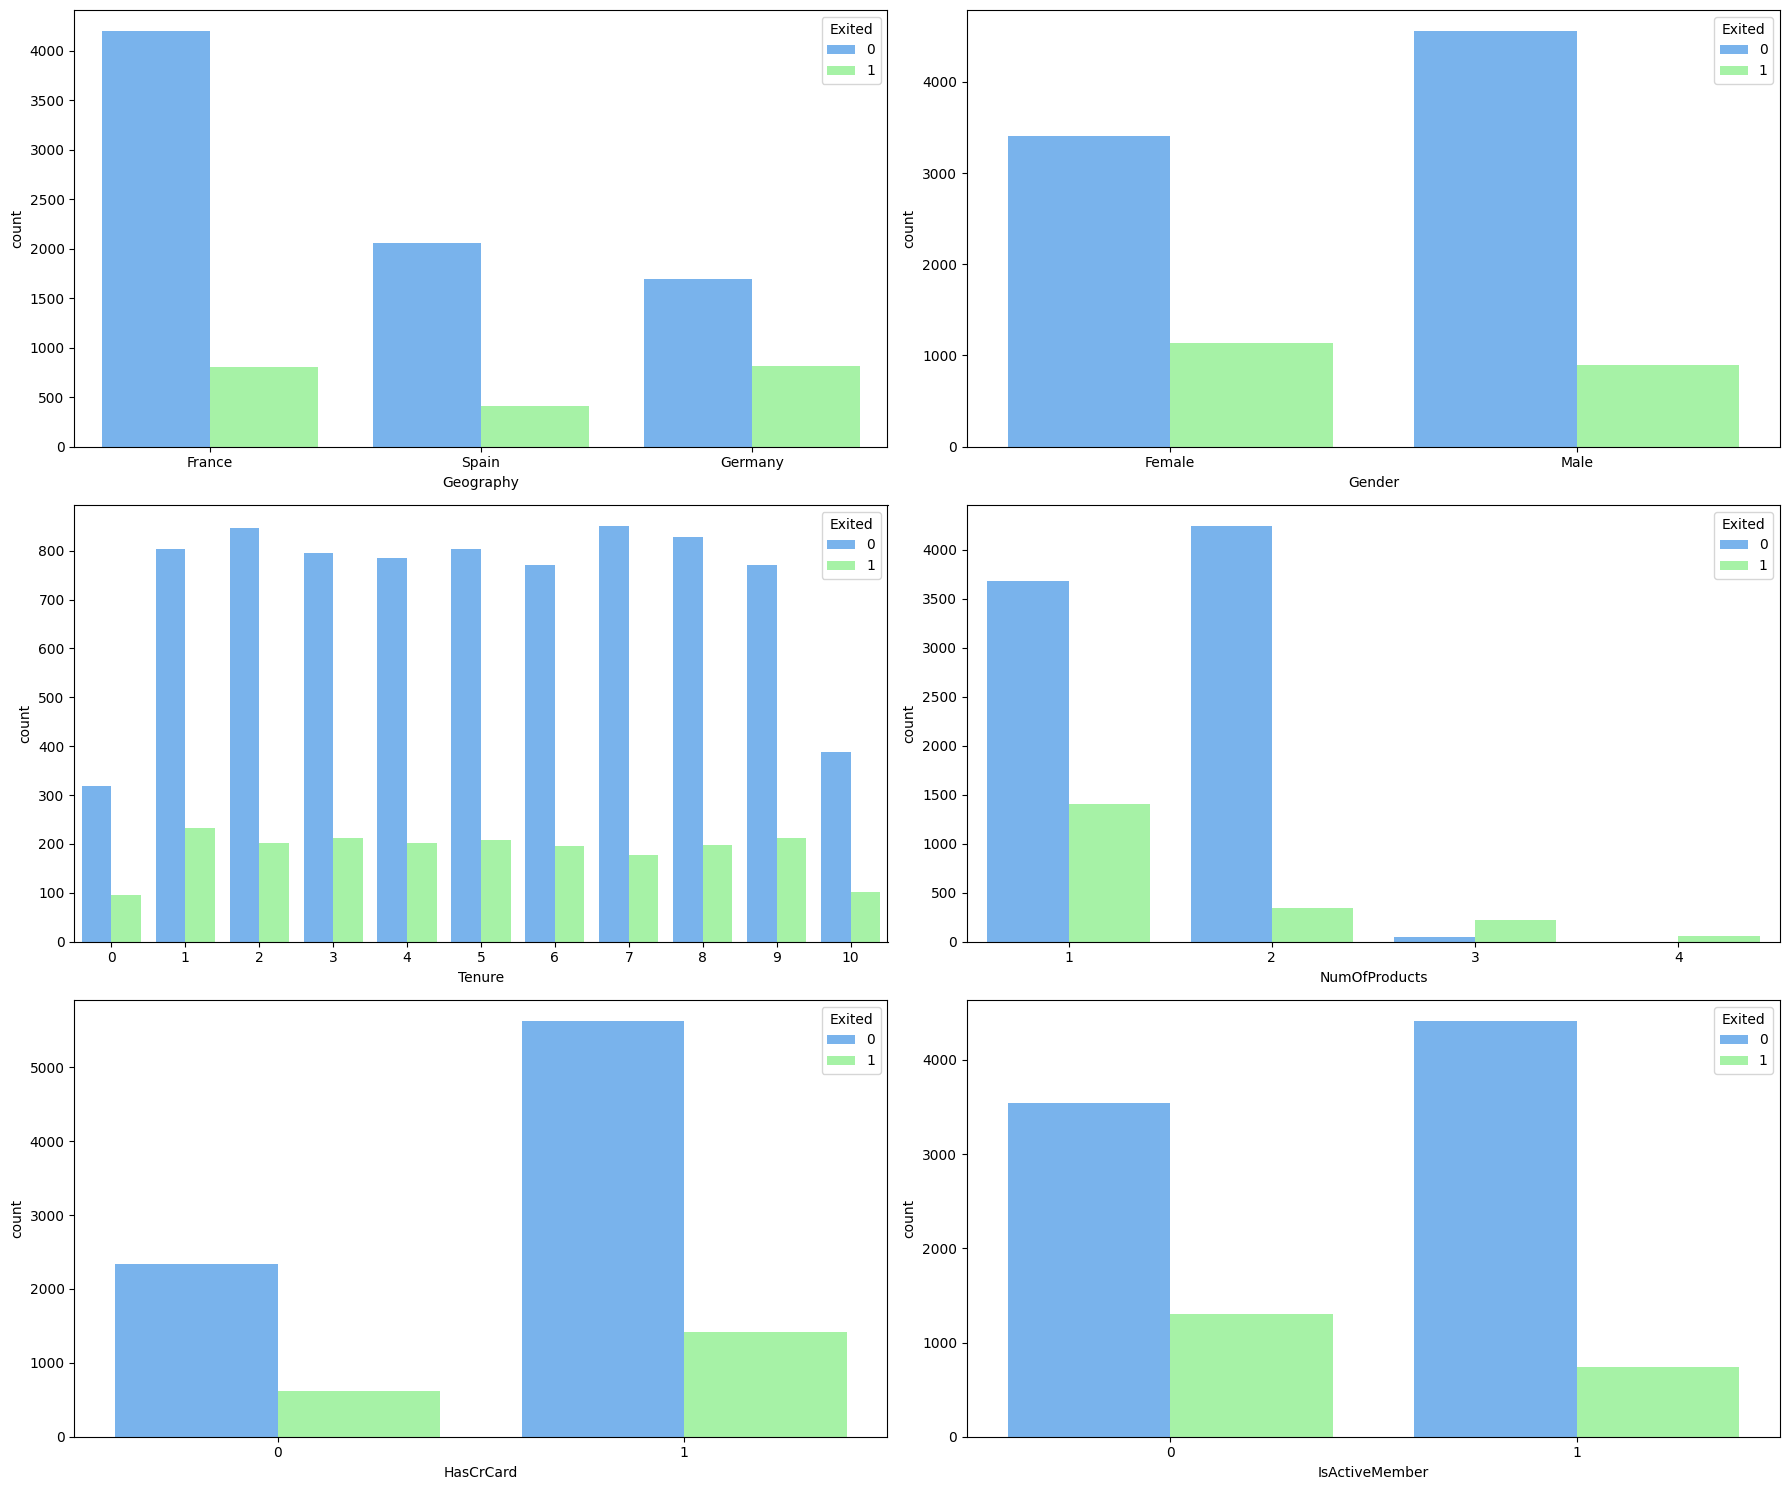

In [11]:
# visualizing categorical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
colors = ['#66b3ff', '#99ff99']

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0], palette=colors)
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1], palette=colors)
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0], palette=colors)
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1], palette=colors)
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0], palette=colors)
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1], palette=colors)

plt.tight_layout()
plt.show()

### Based on the plots above, we can determine that:- 

The bulk of the clients are from France, but the majority of those that have left are from Germany, possibly as a result of resource shortages brought on by the small client base. 

In addition, a higher percentage of female customers are leaving than male customers. 

The majority of clients have tenures ranging from 1 to 9, and the rate of attrition is high in between.

The majority of customers own one or two products, and the majority of those that have churned have only one product—possibly because they were dissatisfied and wanted something else. 

It's interesting to note that most of the customers who churned had credit cards, though this could just be a coincidence given that most customers do. 

It should come as no surprise that there is a higher turnover rate among inactive members, with a relatively high percentage overall.

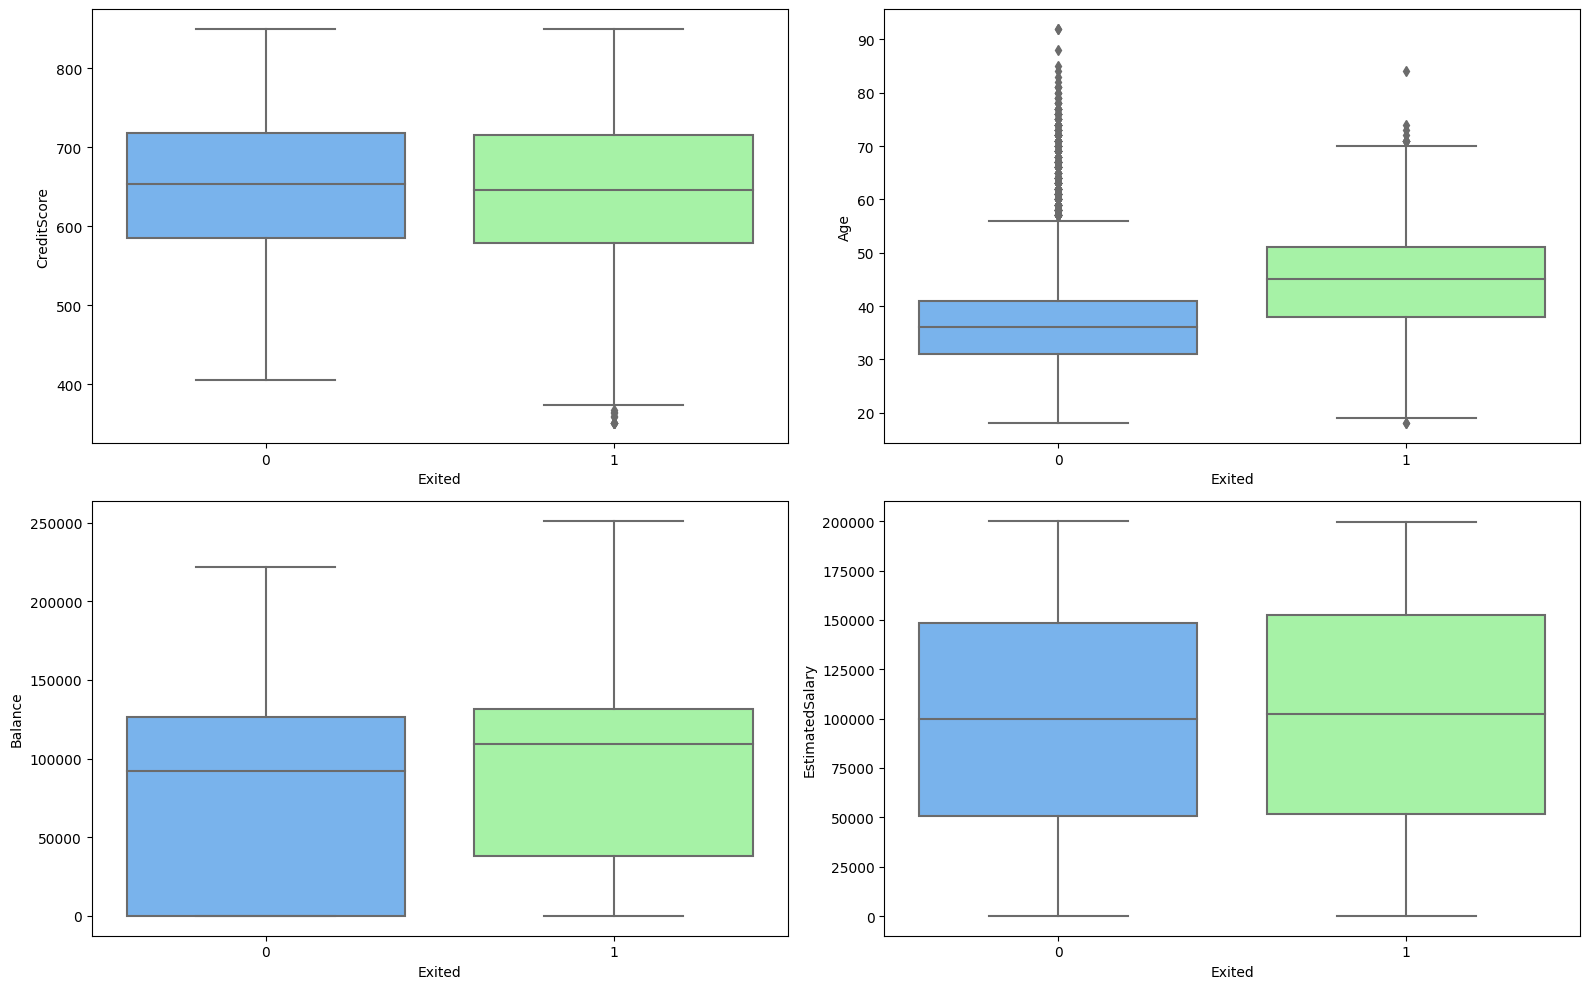

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
colors = ['#66b3ff', '#99ff99']

sns.boxplot(x='Exited', y='CreditScore', data=df, ax=ax[0][0], palette=colors)
sns.boxplot(x='Exited', y='Age', data=df, ax=ax[0][1], palette=colors)
sns.boxplot(x='Exited', y='Balance', data=df, ax=ax[1][0], palette=colors)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=ax[1][1], palette=colors)

plt.tight_layout()
plt.show()

### Based on the plots above, we can determine that:

The distribution of credit scores does not significantly differ between customers who experience churning and those who do not.

More elderly clients are leaving than new ones.

The bank is losing clients who have sizable balances.

The chance of churn is not significantly impacted by estimated salary.

It's interesting to note that most of the customers who churned had credit cards, though this could just be a coincidence given that most customers do.

It should come as no surprise that there is a higher turnover rate among inactive members, with a relatively high percentage overall.

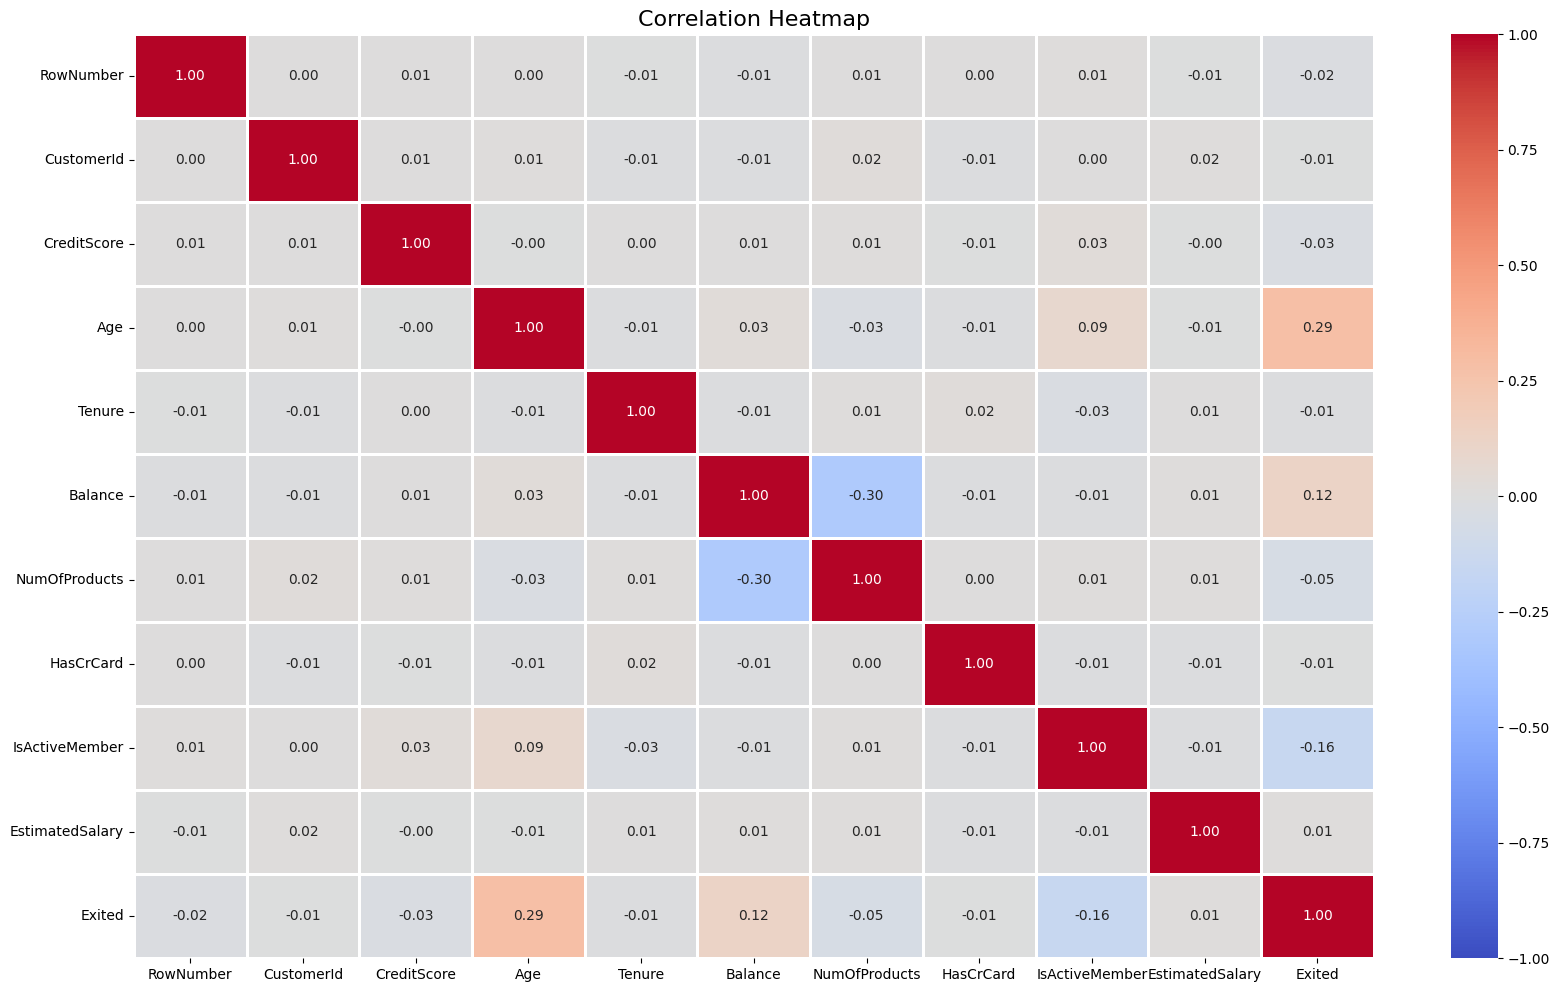

In [13]:
#Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64']) 
plt.figure(figsize=(20, 12))
corr = numeric_df.corr()
sns.heatmap(corr, linewidths=1, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [14]:
# dropping useless columns 
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
# Encoding categorical variables

df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# creating features and label 
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

2024-01-31 14:54:56.471769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 14:54:56.471908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 14:54:56.667096: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
# Scaling data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 50)


Epoch 1/50
250/250 [==============================] - 3s 4ms/step - loss: 0.6020 - accuracy: 0.7237 - val_loss: 0.5272 - val_accuracy: 0.7990
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.8234 - val_loss: 0.3874 - val_accuracy: 0.8460
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3868 - accuracy: 0.8389 - val_loss: 0.3609 - val_accuracy: 0.8515
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8421 - val_loss: 0.3608 - val_accuracy: 0.8500
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8438 - val_loss: 0.3593 - val_accuracy: 0.8520
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8380 - val_loss: 0.3596 - val_accuracy: 0.8495
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8476 - val_loss: 0.3620 - val_accuracy: 0.8490
Epoch 

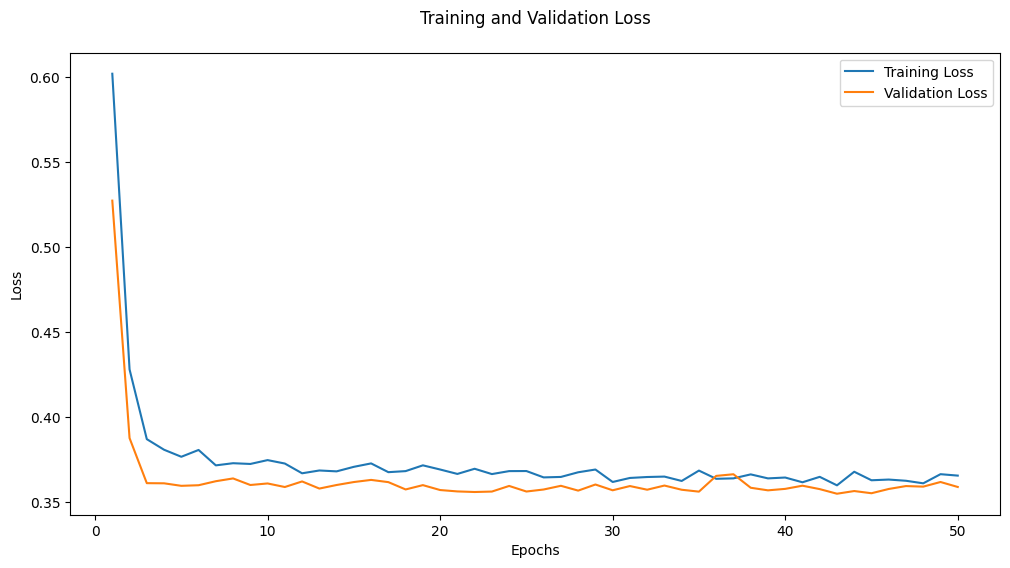

In [27]:
#Visualizing Training and Validation Loss

plt.figure(figsize=(12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 51)

sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

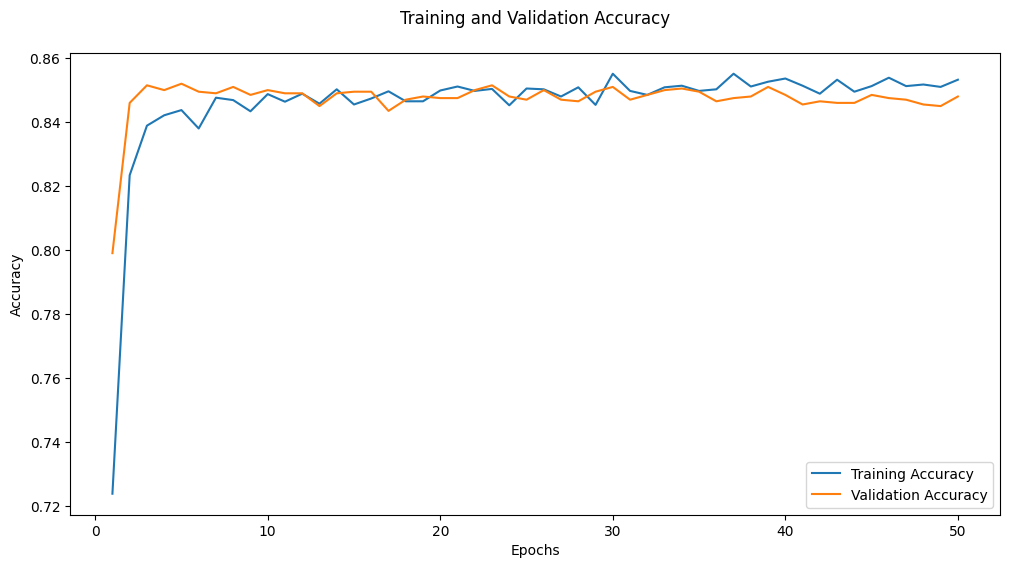

In [30]:
# Visualizing Training and Validation accuracy
plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epoch = range(1, 51)

sns.lineplot(x=epoch, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epoch, y=val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)  

# Calculate and print the classification report
print(classification_report(y_test_classes, y_pred_classes))

63/63 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1598
           1       0.76      0.36      0.48       402

    accuracy                           0.85      2000
   macro avg       0.81      0.66      0.70      2000
weighted avg       0.84      0.85      0.83      2000

